In [1]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


# Census data

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/CMPUT 664 : SSE/Data/adult census/adult.data',header= None,delimiter=",")
df[14] = np.where(df[14]==' <=50K', 0, 1)

df

FileNotFoundError: ignored

In [ ]:
x = df.drop(14,axis = 1 )
y = df[14]
x = pd.get_dummies(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.34, random_state=42)

overfitting SVM

In [ ]:
train_acc = []
test_acc = []

for i in range(1,501):
  clf = make_pipeline(StandardScaler(), SVC( C=i, kernel='rbf', degree=2))
  clf.fit(x_train, y_train)
  print('-'*10)
  print(f'Training with {i} estimators')
  y_pred_train = clf.predict(x_train)
  train_a = accuracy_score(y_train, y_pred_train, normalize=True)*100
  print('accuracy on train data is',train_a)
  train_acc.append(train_a)

  y_pred_test = clf.predict(x_test)
  test_a = accuracy_score(y_test, y_pred_test, normalize=True)*100
  print('accuracy on test data is',test_a)
  test_acc.append(test_a)

In [ ]:
import matplotlib.pyplot as plt
# line 1 points
y1 = train_acc
x1 = range(2,301)
# plotting the line 1 points 
plt.plot(x1, y1, label = 'train_accuracy')
# line 2 points
y2 = test_acc
x2 = range(2,301)
# plotting the line 2 points 
plt.plot(x2, y2, label = "test_accuracy")
plt.xlabel('estimators')
# Set the y axis label of the current axis.
plt.ylabel('accuracies')
# Set a title of the current axes.
plt.title('Variation of accuracies with estimators')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


overfitting decsion tree

In [ ]:
# Decision Tree

# clf = DecisionTreeClassifier(random_state=0).fit(x_train,y_train)

In [ ]:
# the code below is to use the test file given in dataset

# test = pd.read_csv('/content/drive/Shareddrives/CMPUT 664 : SSE/Data/adult census/adult.test',header= None,delimiter=",")
# test[14] = np.where(test[14]==' <=50K', 0, 1)
# xtest = test.drop(14,axis = 1 )
# ytest = test[14]
# xtest = pd.get_dummies(test)

overfitting RF

In [ ]:
clf = RandomForestClassifier(max_depth=10, n_estimators = 2, random_state=0)

train_acc = []
test_acc = []

for i in range(1,501):
  clf.fit(x_train, y_train)
  print('-'*10)
  print(f'Training with {i} estimators')
  y_pred_train = clf.predict(x_train)
  train_a = accuracy_score(y_train, y_pred_train, normalize=True)*100
  print('accuracy on train data is',train_a)
  train_acc.append(train_a)

  y_pred_test = clf.predict(x_test)
  test_a = accuracy_score(y_test, y_pred_test, normalize=True)*100
  print('accuracy on test data is',test_a)
  test_acc.append(test_a)
  
  clf.n_estimators += 1


checking if overfitted 

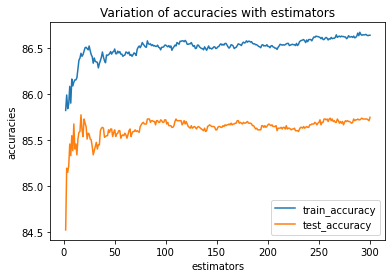

In [ ]:
import matplotlib.pyplot as plt
# line 1 points
y1 = train_acc
x1 = range(2,301)
# plotting the line 1 points 
plt.plot(x1, y1, label = 'train_accuracy')
# line 2 points
y2 = test_acc
x2 = range(2,301)
# plotting the line 2 points 
plt.plot(x2, y2, label = "test_accuracy")
plt.xlabel('estimators')
# Set the y axis label of the current axis.
plt.ylabel('accuracies')
# Set a title of the current axes.
plt.title('Variation of accuracies with estimators')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


# Customer value data

In [ ]:
# !unzip '/content/drive/Shareddrives/CMPUT 664 : SSE/Data/customer_value.zip' -d '/content/drive/Shareddrives/CMPUT 664 : SSE/Data'

unzip:  cannot find or open /content/drive/Shareddrives/CMPUT 664 : SSE/Data/customer_value.zip, /content/drive/Shareddrives/CMPUT 664 : SSE/Data/customer_value.zip.zip or /content/drive/Shareddrives/CMPUT 664 : SSE/Data/customer_value.zip.ZIP.


In [ ]:
# df = pd.read_csv('/content/drive/Shareddrives/CMPUT 664 : SSE/Data/customer_value/transactions.csv.gz', compression='gzip', header=0,    sep=' ', quotechar='"', error_bad_lines=False)
path = '/content/drive/Shareddrives/CMPUT 664 : SSE/Data/customer_value/transactions.csv.gz'
chunk_size=50000
batch_no=1
for chunk in pd.read_csv(path,chunksize=chunk_size,compression='gzip', error_bad_lines=False):
    df = pd.DataFrame(chunk)
    break
df.head(2)

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
0,86246,205,7,707,1078778070,12564,2012-03-02,12.0,OZ,1,7.59
1,86246,205,63,6319,107654575,17876,2012-03-02,64.0,OZ,1,1.59


### overfitted DT

In [ ]:
x = df.drop(['id','chain','company','date'],axis = 1 )
y = df['purchaseamount']
x = pd.get_dummies(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.34, random_state=42)


In [ ]:
# Decision Tree

train_acc = []
test_acc = []

for i in range(300,1001):
  clf = DecisionTreeRegressor(random_state=0,max_leaf_nodes = i,max_depth = 10,max_features = 10).fit(x_train,y_train)
  print('-'*10)
  print(f'Training with {i} estimators')
  y_pred_train = clf.predict(x_train)
  train_a = metrics.mean_absolute_error(y_train, y_pred_train)
  print('accuracy on train data is',train_a)
  train_acc.append(train_a)

  y_pred_test = clf.predict(x_test)
  test_a = metrics.mean_absolute_error(y_test, y_pred_test)
  print('accuracy on test data is',test_a)
  test_acc.append(test_a)
  

----------
Training with 300 estimators
accuracy on train data is 0.030219262055864476
accuracy on test data is 0.05148128000228891
----------
Training with 301 estimators
accuracy on train data is 0.030170719487321914
accuracy on test data is 0.05148027159892757
----------
Training with 302 estimators
accuracy on train data is 0.02984447569874571
accuracy on test data is 0.05116727331517794
----------
Training with 303 estimators
accuracy on train data is 0.029820233274503286
accuracy on test data is 0.05121433213870735
----------
Training with 304 estimators
accuracy on train data is 0.029783373770371054
accuracy on test data is 0.051206382049580786
----------
Training with 305 estimators
accuracy on train data is 0.029745711432708717
accuracy on test data is 0.051196550116807675
----------
Training with 306 estimators
accuracy on train data is 0.02971864072563801
accuracy on test data is 0.051196550116807675
----------
Training with 307 estimators
accuracy on train data is 0.0297245

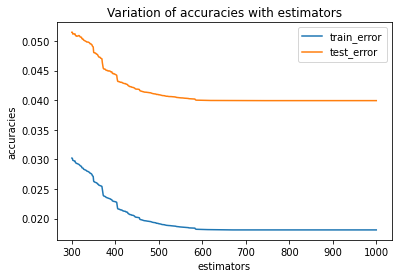

In [ ]:
import matplotlib.pyplot as plt
# line 1 points
y1 = train_acc
x1 = range(300,1001)
# plotting the line 1 points 
plt.plot(x1, y1, label = 'train_error')
# line 2 points
y2 = test_acc
x2 = range(300,1001)
# plotting the line 2 points 
plt.plot(x2, y2, label = "test_error")
plt.xlabel('estimators')
# Set the y axis label of the current axis.
plt.ylabel('MAE')
# Set a title of the current axes.
plt.title('Variation of accuracies with estimators')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

### not-overfitted RF

In [ ]:
clf = RandomForestRegressor(random_state=0)


clf.fit(x_train, y_train)
print('-'*10)
# print(f'Training with {i} estimators')
y_pred_train = clf.predict(x_train)
train_a = metrics.mean_absolute_error(y_train, y_pred_train)
print('mae on train data is',train_a)
# train_acc.append(train_a)

y_pred_test = clf.predict(x_test)
test_a = metrics.mean_absolute_error(y_test, y_pred_test)
print('mae on test data is',test_a)
# test_acc.append(test_a)
  


----------
accuracy on train data is 0.004839512121217848
accuracy on test data is 0.008961900000005586


# breast cancer dataset

In [ ]:
df = pd.read_csv('/content/breast-cancer.data',header=None)
df

,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
x = df.drop(9,axis = 1 )
# df[14] = np.where(df[9]=='no', 0, 1)

y = df[9]
x = pd.get_dummies(x)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.34, random_state=42)

## overfitting DT

In [ ]:
# Decision Tree

train_acc = []
test_acc = []

for i in range(2,301):
  clf = DecisionTreeClassifier(random_state=0,max_leaf_nodes = i).fit(x_train,y_train)
  print('-'*10)
  print(f'Training with {i} estimators')
  y_pred_train = clf.predict(x_train)
  train_a = accuracy_score(y_train, y_pred_train, normalize=True)*100
  print('accuracy on train data is',train_a)
  train_acc.append(train_a)

  y_pred_test = clf.predict(x_test)
  test_a = accuracy_score(y_test, y_pred_test, normalize=True)*100
  print('accuracy on test data is',test_a)
  test_acc.append(test_a)

----------
Training with 2 estimators
accuracy on train data is 100.0
accuracy on test data is 100.0
----------
Training with 3 estimators
accuracy on train data is 100.0
accuracy on test data is 100.0
----------
Training with 4 estimators
accuracy on train data is 100.0
accuracy on test data is 100.0
----------
Training with 5 estimators
accuracy on train data is 100.0
accuracy on test data is 100.0
----------
Training with 6 estimators
accuracy on train data is 100.0
accuracy on test data is 100.0
----------
Training with 7 estimators
accuracy on train data is 100.0
accuracy on test data is 100.0
----------
Training with 8 estimators
accuracy on train data is 100.0
accuracy on test data is 100.0
----------
Training with 9 estimators
accuracy on train data is 100.0
accuracy on test data is 100.0
----------
Training with 10 estimators
accuracy on train data is 100.0
accuracy on test data is 100.0
----------
Training with 11 estimators
accuracy on train data is 100.0
accuracy on test da

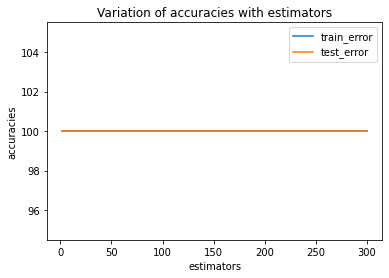

In [ ]:
import matplotlib.pyplot as plt
# line 1 points
y1 = train_acc
x1 = range(2,301)
# plotting the line 1 points 
plt.plot(x1, y1, label = 'train_error')
# line 2 points
y2 = test_acc
x2 = range(2,301)
# plotting the line 2 points 
plt.plot(x2, y2, label = "test_error")
plt.xlabel('estimators')
# Set the y axis label of the current axis.
plt.ylabel('accuracies')
# Set a title of the current axes.
plt.title('Variation of accuracies with estimators')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## not-overfitted RF

In [ ]:
clf = RandomForestClassifier(n_estimators = 2,random_state=0)


clf.fit(x_train, y_train)
print('-'*10)
print(f'Training with {i} estimators')
y_pred_train = clf.predict(x_train)
train_a = accuracy_score(y_train, y_pred_train, normalize=True)*100
print('accuracy on train data is',train_a)
train_acc.append(train_a)

y_pred_test = clf.predict(x_test)
test_a = accuracy_score(y_test, y_pred_test, normalize=True)*100
print('accuracy on test data is',test_a)
test_acc.append(test_a)

----------
Training with 300 estimators
accuracy on train data is 96.80851063829788
accuracy on test data is 88.77551020408163


# Diabetes data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_dia = pd.read_csv('/content/drive/Shareddrives/CMPUT 664 : SSE/Data/Pima Diabetes/diabetes.csv')

In [ ]:
x = df_dia.drop('Outcome',axis = 1 )
# df[14] = np.where(df[9]=='no', 0, 1)

y = df_dia['Outcome']
# x = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## overfitted DT

In [ ]:
# Decision Tree

train_acc = []
test_acc = []

for i in range(2,301):
  clf = DecisionTreeClassifier(random_state=0,max_leaf_nodes = i).fit(x_train,y_train)
  print('-'*10)
  print(f'Training with {i} estimators')
  y_pred_train = clf.predict(x_train)
  train_a = accuracy_score(y_train, y_pred_train, normalize=True)*100
  print('accuracy on train data is',train_a)
  train_acc.append(train_a)

  y_pred_test = clf.predict(x_test)
  test_a = accuracy_score(y_test, y_pred_test, normalize=True)*100
  print('accuracy on test data is',test_a)
  test_acc.append(test_a)

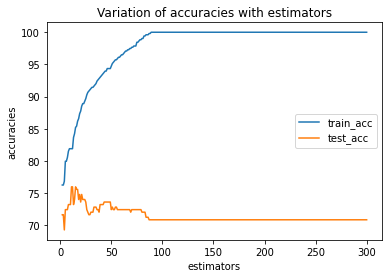

In [ ]:
import matplotlib.pyplot as plt
# line 1 points
y1 = train_acc
x1 = range(2,301)
# plotting the line 1 points 
plt.plot(x1, y1, label = 'train_acc')
# line 2 points
y2 = test_acc
x2 = range(2,301)
# plotting the line 2 points 
plt.plot(x2, y2, label = "test_acc")
plt.xlabel('estimators')
# Set the y axis label of the current axis.
plt.ylabel('accuracies')
# Set a title of the current axes.
plt.title('Variation of accuracies with estimators')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## not overfitted-RF

In [ ]:
# Random forest 
clf = RandomForestClassifier(n_estimators = 4,random_state=0)


clf.fit(x_train, y_train)
print('-'*10)
print(f'Training RF')
y_pred_train = clf.predict(x_train)
train_a = accuracy_score(y_train, y_pred_train, normalize=True)*100
print('accuracy on train data is',train_a)
train_acc.append(train_a)

y_pred_test = clf.predict(x_test)
test_a = accuracy_score(y_test, y_pred_test, normalize=True)*100
print('accuracy on test data is',test_a)
test_acc.append(test_a)

----------
Training RF
accuracy on train data is 94.94163424124513
accuracy on test data is 71.65354330708661


# seed dataset

In [ ]:
df_seed = pd.read_csv('/content/drive/Shareddrives/CMPUT 664 : SSE/Data/Weed Dataset/synthetic_seed.csv').drop('Unnamed: 0',axis =1 )

In [ ]:
x = df_seed.drop('class',axis = 1 )
# df[14] = np.where(df[9]=='no', 0, 1)

y = df_seed['class']
# x = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## overfitted DT

In [ ]:
# Decision Tree

train_acc = []
test_acc = []

for i in range(2,301):
  clf = DecisionTreeClassifier(random_state=0,max_leaf_nodes = i).fit(x_train,y_train)
  print('-'*10)
  print(f'Training with {i} estimators')
  y_pred_train = clf.predict(x_train)
  train_a = accuracy_score(y_train, y_pred_train, normalize=True)*100
  print('accuracy on train data is',train_a)
  train_acc.append(train_a)

  y_pred_test = clf.predict(x_test)
  test_a = accuracy_score(y_test, y_pred_test, normalize=True)*100
  print('accuracy on test data is',test_a)
  test_acc.append(test_a)

----------
Training with 2 estimators
accuracy on train data is 59.285714285714285
accuracy on test data is 55.714285714285715
----------
Training with 3 estimators
accuracy on train data is 81.42857142857143
accuracy on test data is 71.42857142857143
----------
Training with 4 estimators
accuracy on train data is 86.42857142857143
accuracy on test data is 72.85714285714285
----------
Training with 5 estimators
accuracy on train data is 89.28571428571429
accuracy on test data is 72.85714285714285
----------
Training with 6 estimators
accuracy on train data is 91.42857142857143
accuracy on test data is 72.85714285714285
----------
Training with 7 estimators
accuracy on train data is 91.42857142857143
accuracy on test data is 72.85714285714285
----------
Training with 8 estimators
accuracy on train data is 93.57142857142857
accuracy on test data is 77.14285714285715
----------
Training with 9 estimators
accuracy on train data is 95.0
accuracy on test data is 77.14285714285715
----------


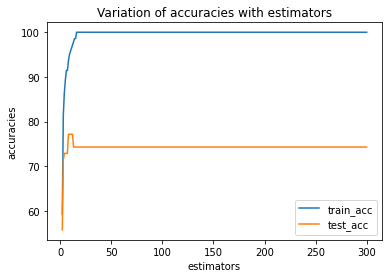

In [ ]:
import matplotlib.pyplot as plt
# line 1 points
y1 = train_acc
x1 = range(2,301)
# plotting the line 1 points 
plt.plot(x1, y1, label = 'train_acc')
# line 2 points
y2 = test_acc
x2 = range(2,301)
# plotting the line 2 points 
plt.plot(x2, y2, label = "test_acc")
plt.xlabel('estimators')
# Set the y axis label of the current axis.
plt.ylabel('accuracies')
# Set a title of the current axes.
plt.title('Variation of accuracies with estimators')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## not overfitted-RF

In [ ]:
# Random forest 
clf = RandomForestClassifier(n_estimators = 4,random_state=0)


clf.fit(x_train, y_train)
print('-'*10)
print(f'Training RF')
y_pred_train = clf.predict(x_train)
train_a = accuracy_score(y_train, y_pred_train, normalize=True)*100
print('accuracy on train data is',train_a)
train_acc.append(train_a)

y_pred_test = clf.predict(x_test)
test_a = accuracy_score(y_test, y_pred_test, normalize=True)*100
print('accuracy on test data is',test_a)
test_acc.append(test_a)

----------
Training RF
accuracy on train data is 98.57142857142858
accuracy on test data is 71.42857142857143


# heart disease 

In [4]:
df_heart = pd.read_csv('/content/drive/Shareddrives/CMPUT 664 : SSE/Data/Heart Disease/cleveland.csv', header = None)
df_heart[13] = np.where(df_heart[13]==0, 0, 1)
df_heart = df_heart.fillna(0)

In [5]:
x = df_heart.drop(13,axis = 1 )
# df[14] = np.where(df[9]=='no', 0, 1)

y = df_heart[13]
# x = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [10]:
y_train.value_counts()

0    113
1     90
Name: 13, dtype: int64

## overfitted DT

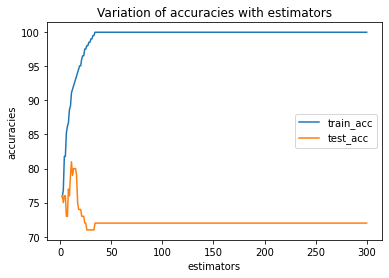

In [6]:
# Decision Tree

train_acc = []
test_acc = []

for i in range(2,301):
  clf = DecisionTreeClassifier(random_state=0,max_leaf_nodes = i).fit(x_train,y_train)
  # print('-'*10)
  # print(f'Training with {i} estimators')
  y_pred_train = clf.predict(x_train)
  train_a = accuracy_score(y_train, y_pred_train, normalize=True)*100
  # print('accuracy on train data is',train_a)
  train_acc.append(train_a)

  y_pred_test = clf.predict(x_test)
  test_a = accuracy_score(y_test, y_pred_test, normalize=True)*100
  # print('accuracy on test data is',test_a)
  test_acc.append(test_a)

import matplotlib.pyplot as plt
# line 1 points
y1 = train_acc
x1 = range(2,301)
# plotting the line 1 points 
plt.plot(x1, y1, label = 'train_acc')
# line 2 points
y2 = test_acc
x2 = range(2,301)
# plotting the line 2 points 
plt.plot(x2, y2, label = "test_acc")
plt.xlabel('estimators')
# Set the y axis label of the current axis.
plt.ylabel('accuracies')
# Set a title of the current axes.
plt.title('Variation of accuracies with estimators')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## not overfitted-RF

In [ ]:
# Random forest 
clf = RandomForestClassifier(n_estimators = 4,random_state=0)


clf.fit(x_train, y_train)
print('-'*10)
print(f'Training RF')
y_pred_train = clf.predict(x_train)
train_a = accuracy_score(y_train, y_pred_train, normalize=True)*100
print('accuracy on train data is',train_a)
train_acc.append(train_a)

y_pred_test = clf.predict(x_test)
test_a = accuracy_score(y_test, y_pred_test, normalize=True)*100
print('accuracy on test data is',test_a)
test_acc.append(test_a)

----------
Training RF
accuracy on train data is 94.08866995073892
accuracy on test data is 73.0
